<a href="https://colab.research.google.com/github/krishnad007/project/blob/main/disaster_tweets_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries for data analysis 
import pandas as pd
import numpy as np
# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# libraries for nlp task
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
#machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score

# required for nlp tasks
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df=pd.read_csv('/content/disaster_tweets.csv')
df.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

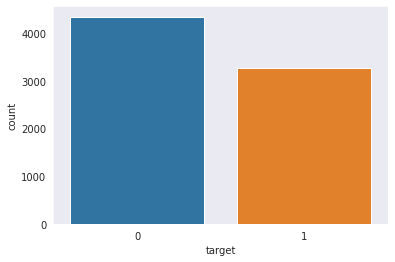

In [ ]:
sns.set_style("dark")
sns.countplot(df.target)


In [ ]:
# new column for storing length of reviews 
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [ ]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [ ]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

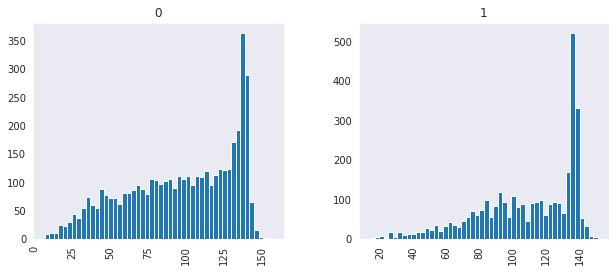

In [ ]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

<ipython-input-11-995264e487a6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text']=df_1['text'].apply(remove_stopwords)
<ipython-input-11-995264e487a6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['text']=df_0['text'].apply(remove_stopwords)


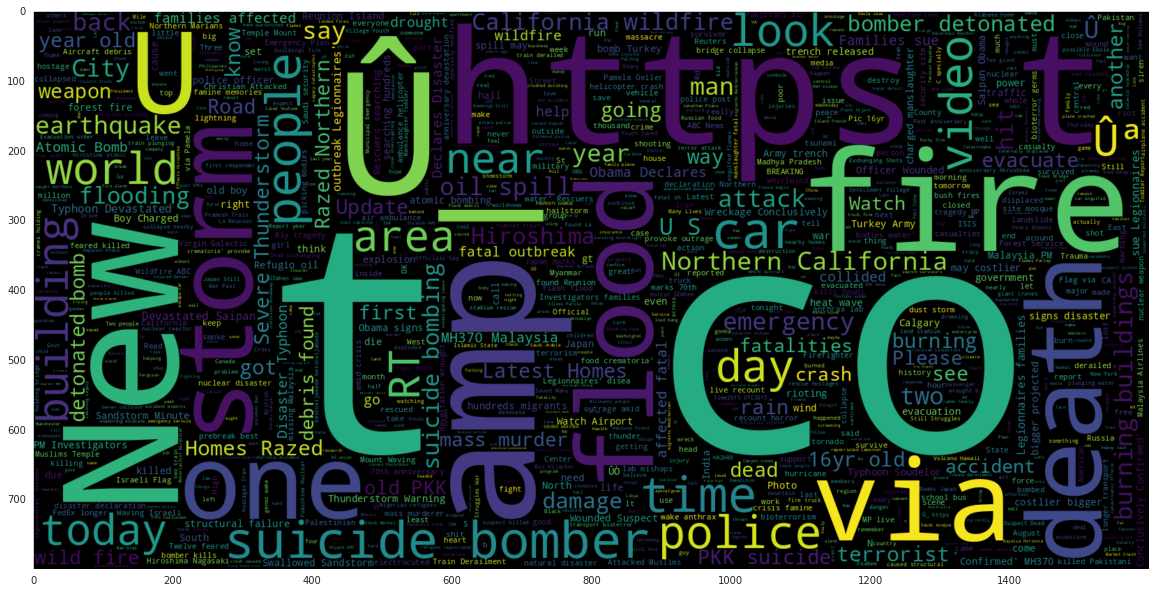

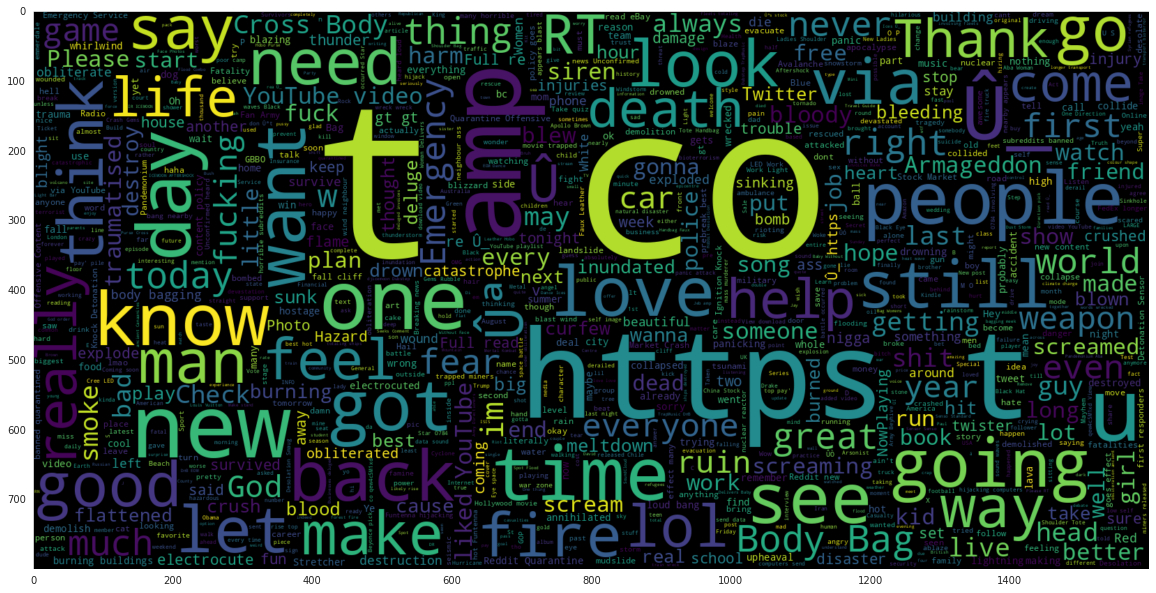

In [ ]:
# segregating dataset into disaster and normal tweets dataframe
df_1 = df[df['target']==1]
df_0 = df[df['target']==0]

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from tweets text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1['text']=df_1['text'].apply(remove_stopwords)
df_0['text']=df_0['text'].apply(remove_stopwords)

# plotting disaster tweets wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600, height = 800).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')

# plotting normal tweets wordcoud

plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')
def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt  
#applying cleantweet function on tweet text column
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


In [ ]:
y = df.target
X=df.cleaned_tweets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [ ]:
# bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# trigrams
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

In [ ]:
## Multi nomial Naive Bayes - bigram
mnb_tf_bigram = MultinomialNB()
mnb_tf_bigram .fit(tfidf_train_2, y_train)

# Passive Aggressive Classifier -bigram
pass_tf_bigram = PassiveAggressiveClassifier()
pass_tf_bigram.fit(tfidf_train_2, y_train)

## Multi nomial Naive Bayes - trigram
mnb_tf_trigram = MultinomialNB()
mnb_tf_trigram .fit(tfidf_train_3, y_train)

# Passive Aggressive Classifier -trigram
pass_tf_trigram = PassiveAggressiveClassifier()
pass_tf_trigram.fit(tfidf_train_3, y_train)

PassiveAggressiveClassifier()

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_passtf2 = cross_val_score(estimator = pass_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_mnb3 = cross_val_score(estimator = mnb_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

acc_passtf3 = cross_val_score(estimator = pass_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

# compare the average 10-fold cross-validation accuracy
crossdict = {        
                'MNB-Bigram': acc_mnb2.mean(),
               
                'PassiveAggressive-Bigram':acc_passtf2.mean(),
               
                'MNB-Trigram': acc_mnb3.mean(), 
               
                'PassiveAggressive-Trigram': acc_passtf3.mean() }

cross_df = pd.DataFrame(crossdict.items(), columns=['Model', 'Cross-val accuracy'])
cross_df = cross_df.sort_values(by=['Cross-val accuracy'], ascending=False)
cross_df

,Model,Cross-val accuracy
0,MNB-Bigram,0.792282
3,PassiveAggressive-Trigram,0.788834
1,PassiveAggressive-Bigram,0.788506
2,MNB-Trigram,0.784565


In [ ]:
pred_mnb2 = mnb_tf_bigram.predict(tfidf_test_2)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)
roc=roc_auc_score(y_test, pred_mnb2)

model_results =pd.DataFrame([['Multinomial Naive Bayes-Bigram',acc, prec,rec,f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Sensitivity,F1 Score,ROC
0,Multinomial Naive Bayes-Bigram,0.800394,0.858607,0.640673,0.7338,0.780636


In [ ]:
y_pred_passtf2 = pass_tf_bigram.predict(tfidf_test_2)
y_pred_mnb3 = mnb_tf_trigram.predict(tfidf_test_3)
y_pred_passtf3 =pass_tf_trigram.predict(tfidf_test_3)


models = {        
                'PassiveAggressive-Bigram':y_pred_passtf2,
               
                'MNB-Trigram': y_pred_mnb3, 
               
                'PassiveAggressive-Trigram': y_pred_passtf3 }

models = pd.DataFrame(models) 
 
for column in models:
    
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
   
    results =pd.DataFrame([[column,acc, prec,rec,f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

# function to highlight maximum value of numeric columns
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]

model_results.style.apply(highlight_max)

<ipython-input-20-64896d5126fe>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-20-64896d5126fe>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-20-64896d5126fe>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-20-64896d5126fe>:30: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://nu

,Model,Accuracy,Precision,Sensitivity,F1 Score,ROC
0,Multinomial Naive Bayes-Bigram,0.800394,0.858607,0.640673,0.733800,0.780636
1,PassiveAggressive-Bigram,0.779383,0.732456,0.766055,0.748879,0.777734
2,MNB-Trigram,0.798424,0.866808,0.626911,0.727595,0.777207
3,PassiveAggressive-Trigram,0.786605,0.747368,0.759939,0.753601,0.783307


In [ ]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [ ]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf_trigram, n=10)
     

0 -2.107183321272441 let
0 -2.003440175469595 love
0 -1.9637615632131835 suicide bomb
0 -1.9163596981525892 panic
0 -1.8768760856309288 bag
0 -1.840192100668998 flattened
0 -1.8294294268408726 hrqcjdovjz
0 -1.8294294268408726 http hrqcjdovjz
0 -1.8294294268408726 mishap http hrqcjdovjz
0 -1.806108578011872 song

1 4.041593065696408 http
1 3.909317144802645 hiroshima
1 3.5869902918204293 california
1 3.0630832667978263 flood
1 3.0538204646327425 wildfire
1 2.975046154404159 building
1 2.930491216870662 train
1 2.9210630808922065 forest
1 2.9011111294234433 bombing
1 2.7157115866048653 killed


In [63]:
#from sklearn.feature_extraction.text import TfidfVectorizer
sentences = [
  "Just happened a terrible car crash",
    "Heard about earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]
#def fun(sentences):
tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf_trigram.predict(tfidf_trigram)
def fun(sentences,predictions):
    for text, label in zip(sentences, predictions):
        if label==1:
            target="Disaster Tweet"
            print("text:", text, "\nClass:", target)
            print()
        else:
            target="Normal Tweet"
            print("text:", text, "\nClass:", target)
            print()

In [65]:
fun(sentences,predictions)

text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet



In [70]:
import pickle
#model2=fun(sentences)
pickle.dump(pass_tf_trigram,open('twimodel.pkl','wb'))




In [71]:
pickled_model=pickle.load(open('twimodel.pkl','rb'))

In [79]:
pred2=pickled_model.predict(tfidf_trigram)
fun(sentences,pred2)


text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet

